In [75]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [76]:
df = pd.read_csv(r"C:\Stack overflow\Tharun-s-training-data\Udemy deep learning\RNN\Part+3+-+Recurrent+Neural+Networks\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Train.csv")

In [77]:
df.head(61)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
56,3/23/2012,322.09,323.04,319.25,640.83,"3,894,800"
57,3/26/2012,321.30,323.53,318.58,647.55,"3,651,900"
58,3/27/2012,322.31,325.53,321.20,645.25,"4,029,400"
59,3/28/2012,324.80,328.07,324.32,653.96,"5,096,700"


In [78]:
train = np.array(df.iloc[:, 1:2].values)
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [98]:
sc = MinMaxScaler()
X = sc.fit_transform(train)
X[60]

array([0.08627874])

In [102]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(X[i -60 : i, 0])
    y_train.append(X[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [103]:
(X_train[1])

array([0.09701243, 0.09433366, 0.09156187, 0.07984225, 0.0643277 ,
       0.0585423 , 0.06568569, 0.06109085, 0.06639259, 0.0614257 ,
       0.07474514, 0.02797827, 0.02379269, 0.02409033, 0.0159238 ,
       0.01078949, 0.00967334, 0.01642607, 0.02100231, 0.02280676,
       0.02273235, 0.02810849, 0.03212665, 0.0433812 , 0.04475779,
       0.04790163, 0.0440695 , 0.04648783, 0.04745517, 0.04873875,
       0.03936305, 0.04137213, 0.04034898, 0.04784582, 0.04325099,
       0.04356723, 0.04286033, 0.04602277, 0.05398467, 0.05738894,
       0.05714711, 0.05569611, 0.04421832, 0.04514845, 0.04605997,
       0.04412531, 0.03675869, 0.04486941, 0.05065481, 0.05214302,
       0.05612397, 0.05818885, 0.06540665, 0.06882953, 0.07243843,
       0.07993526, 0.07846566, 0.08034452, 0.08497656, 0.08627874])

In [104]:
X_train.shape

(1198, 60)

In [105]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [106]:
X_train[0]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.036

In [85]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout

In [86]:
model = Sequential()

In [87]:
model.add(LSTM(
    units = 50,
    return_sequences=True,
    input_shape = (X_train.shape[1], X_train.shape[2])
))

model.add(Dropout(
    rate = 0.2
))

In [88]:
model.add(LSTM(
    units = 50,
    return_sequences=True
))

model.add(Dropout(
    rate = 0.2
))

In [89]:
model.add(LSTM(
    units = 50,
    return_sequences=True
))

model.add(Dropout(
    rate = 0.2
))

In [90]:
model.add(LSTM(
    units = 50,
    return_sequences=False
))

model.add(Dropout(
    rate = 0.2
))

In [92]:
model.add(Dense(
    units = 1
))

In [93]:
model.compile(
    optimizer='adam',
    loss="mean_squared_error"
)

In [107]:
model.fit(
    x= X_train,
    y= y_train,
    batch_size= 32,
    epochs= 100
)

Epoch 1/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0016
Epoch 2/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0016
Epoch 3/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0017
Epoch 4/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0015
Epoch 5/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0017
Epoch 6/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0016
Epoch 7/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0015
Epoch 8/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0016
Epoch 9/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0018
Epoch 10/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0016
Epoch 11/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0019
Epoch 12/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0017
Epoch 13/100
38/38 [=====

In [108]:
import matplotlib.pyplot as plt

In [111]:
test = pd.read_csv(r"C:\Stack overflow\Tharun-s-training-data\Udemy deep learning\RNN\Part+3+-+Recurrent+Neural+Networks\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Test.csv")

In [118]:
test.head(-10)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [117]:
real = np.array(test.iloc[:, 1:2].values)
len(real)

20

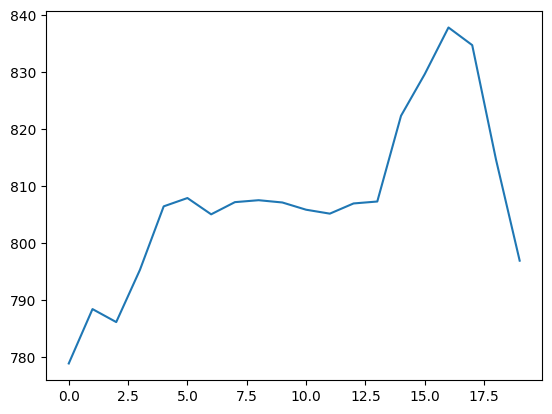

In [120]:
plt.plot(real)
plt.show()

In [136]:
val = train[1198: 1258]

In [137]:
val

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [160]:
val = np.concatenate((val, real))
val[79]
val1 = sc.transform(val)

In [161]:
pre = []
for i in range(60, 80):
    pre.append(val1[i - 60: i, ])

In [162]:
pre = np.array(pre)
pre.shape

(20, 60, 1)

In [163]:
pred = model.predict(pre)

1/1 [==============================] - 0s 28ms/step


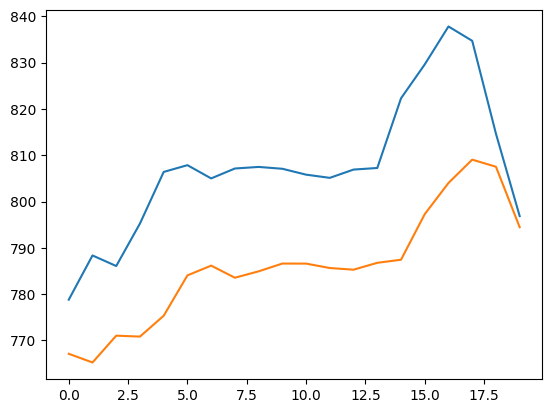

In [166]:
plt.plot(real)
plt.plot(sc.inverse_transform(pred))
plt.show()

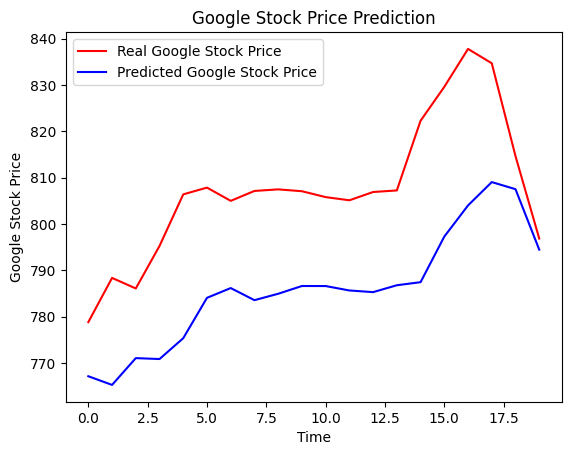

In [169]:
plt.plot(real, color = 'red', label = 'Real Google Stock Price')
plt.plot(sc.inverse_transform(pred), color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()